# Explore here

In [1]:
##importar datos con pandas
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.drop_duplicates().reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()  #nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.to_csv('../data/raw/df_raw.csv', index=False) #guardar en un csv


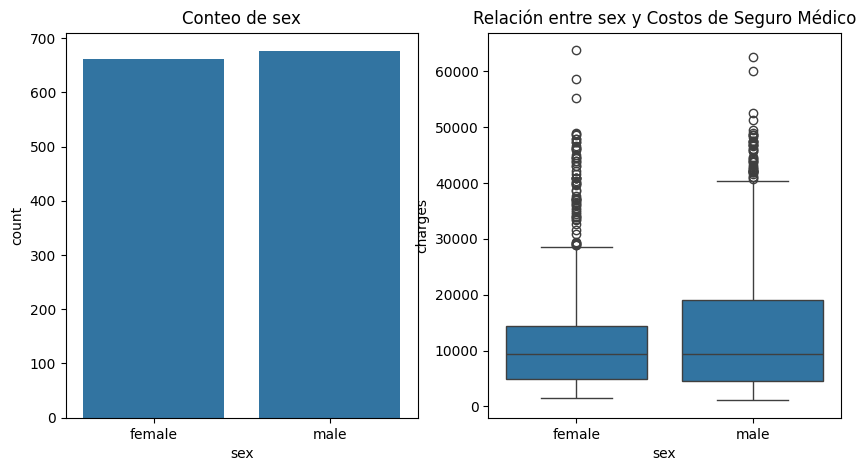

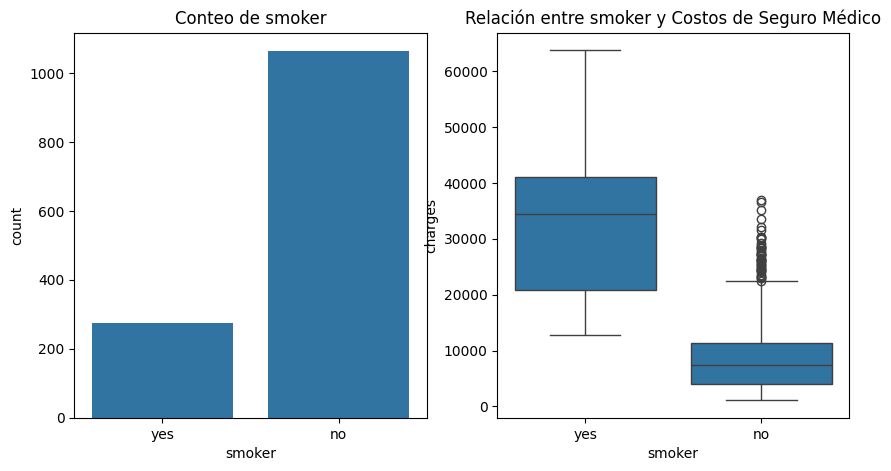

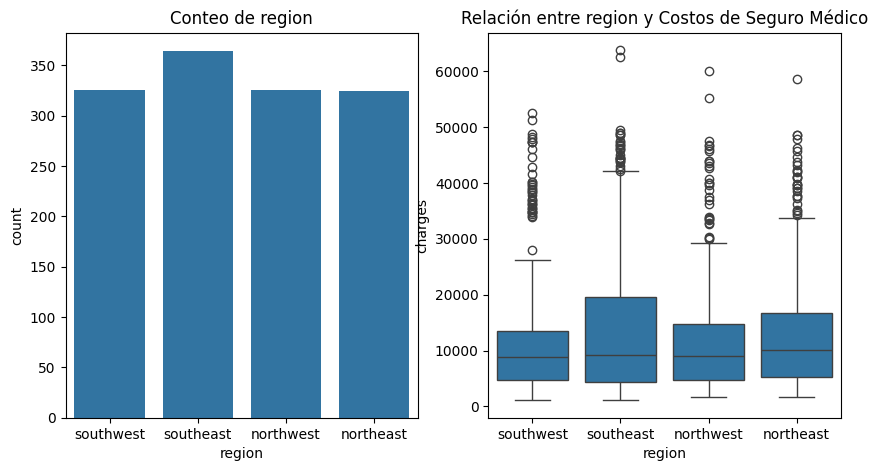

In [8]:
# Variables categóricas
categorical_features = ['sex', 'smoker', 'region']

# Gráficos de barras y boxplots para cada variable categórica
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    
    # Gráfico de barras
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Conteo de {feature}')
    
    # Boxplot relación con 'charges'
    plt.subplot(1, 2, 2)
    sns.boxplot(x=feature, y='charges', data=df)
    plt.title(f'Relación entre {feature} y Costos de Seguro Médico')
    
    

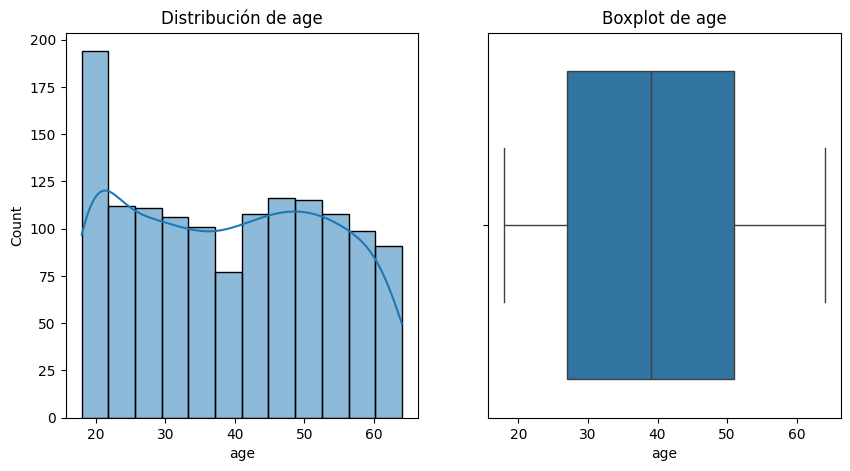

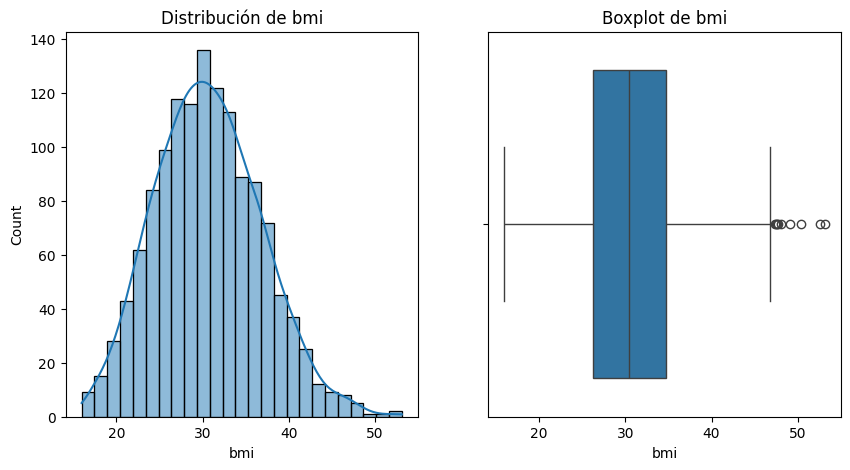

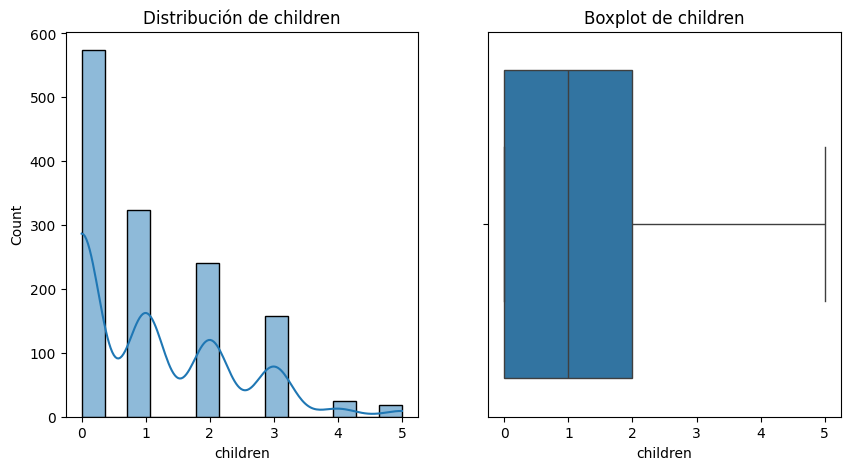

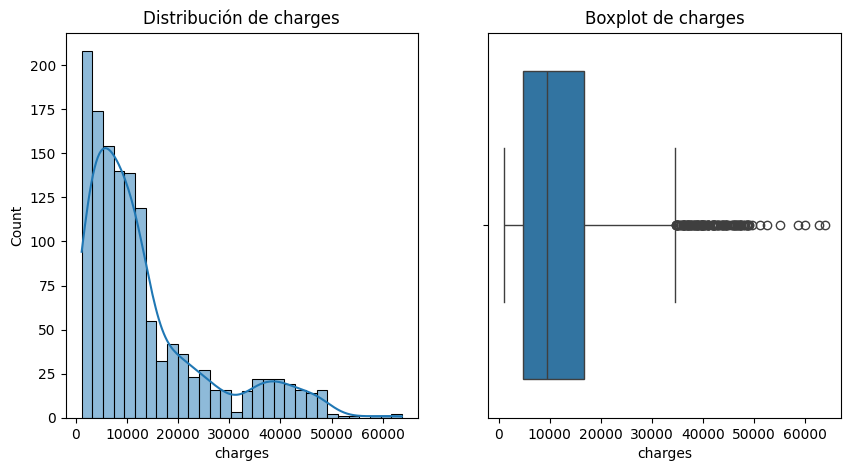

In [6]:
#Analisis Univariante
#Analisis Categorico

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
numerical_features = ['age', 'bmi', 'children', 'charges']

# Histograma y boxplot para cada variable numérica
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    
    

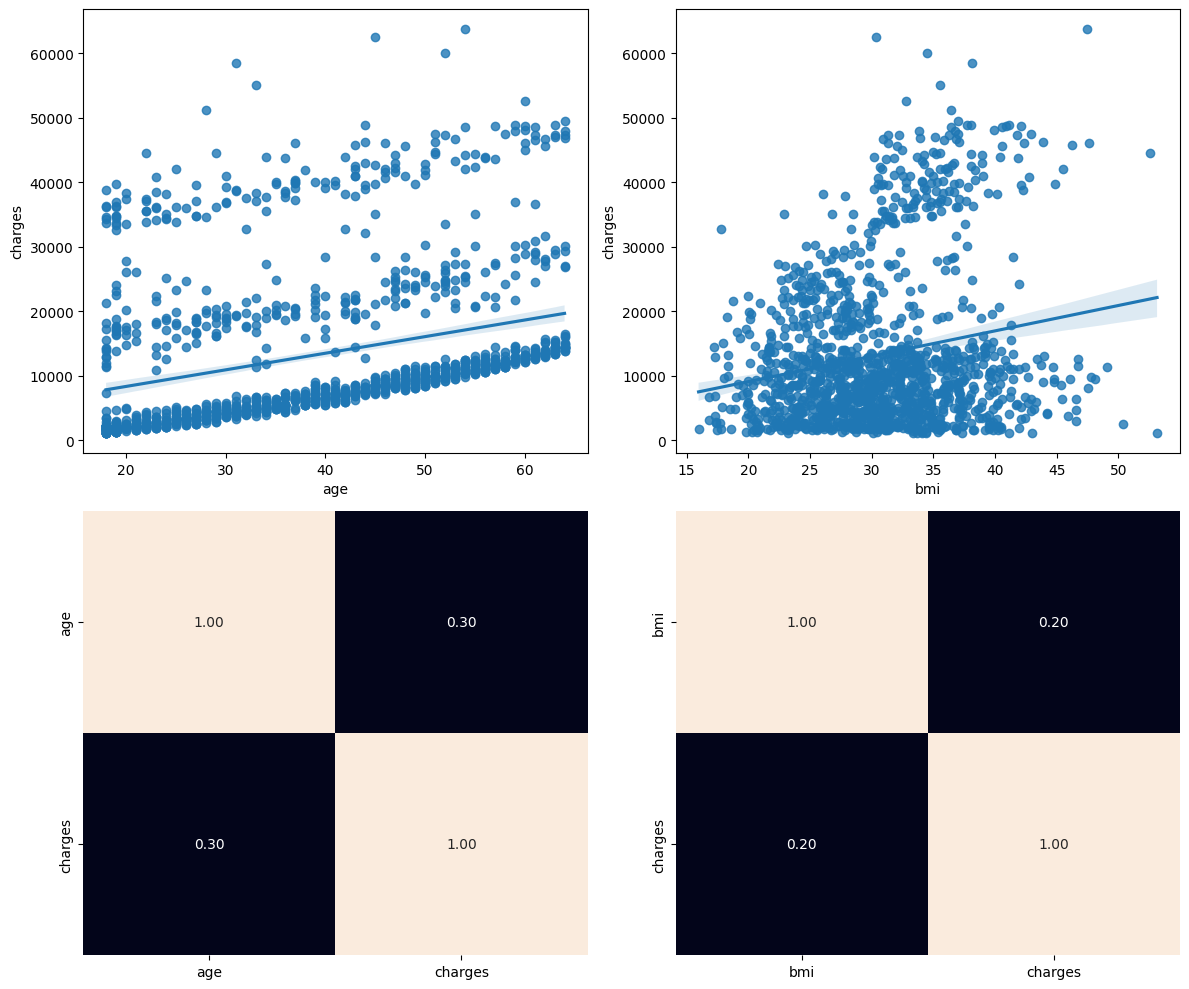

In [11]:
#otra mnera de verlo con heatmap
fig, axis = plt.subplots(2, 2, figsize=(12, 10))

# Primer gráfico de regresión y mapa de calor: age vs. charges
sns.regplot(ax=axis[0, 0], data=df, x='age', y='charges')
sns.heatmap(df[['age', 'charges']].corr(), annot=True, fmt='.2f', ax=axis[1, 0], cbar=False)

# Segundo gráfico de regresión y mapa de calor: bmi vs. charges
sns.regplot(ax=axis[0, 1], data=df, x='bmi', y='charges')
sns.heatmap(df[['bmi', 'charges']].corr(), annot=True, fmt='.2f', ax=axis[1, 1], cbar=False)

# Ajustar el diseño de los gráficos
plt.tight_layout()

# Mostrar los gráficos


Nos permiten visualizar la relación entre las dos variables. Una relación lineal positiva indica que a medida que una variable aumenta, la otra también tiende a aumentar.

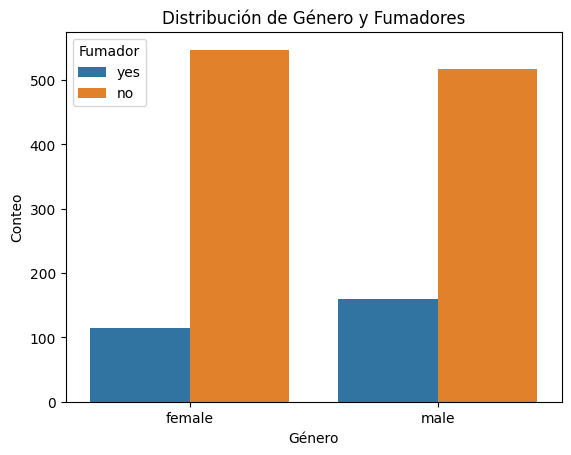

In [12]:
#Analisis categorico -Categorico

sns.countplot(data=df, x='sex', hue='smoker')
plt.title('Distribución de Género y Fumadores')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.legend(title='Fumador')

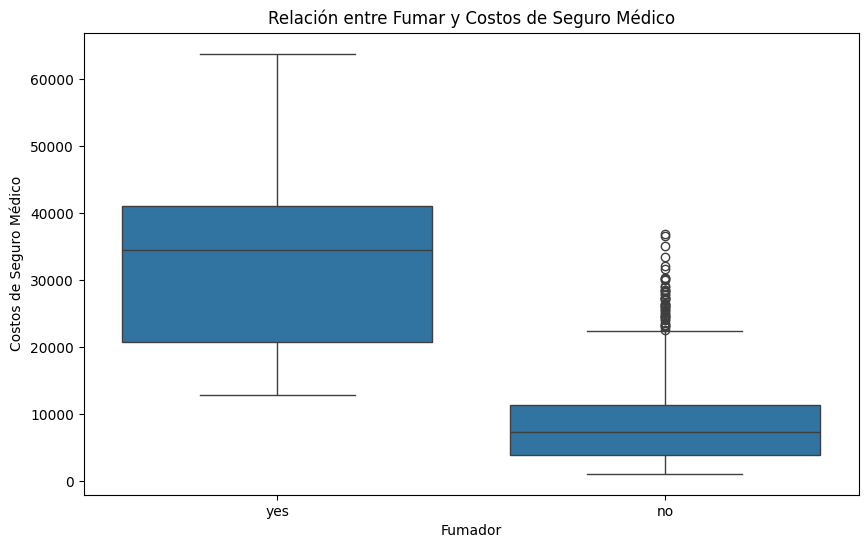

Text(0, 0.5, 'Costos de Seguro Médico')

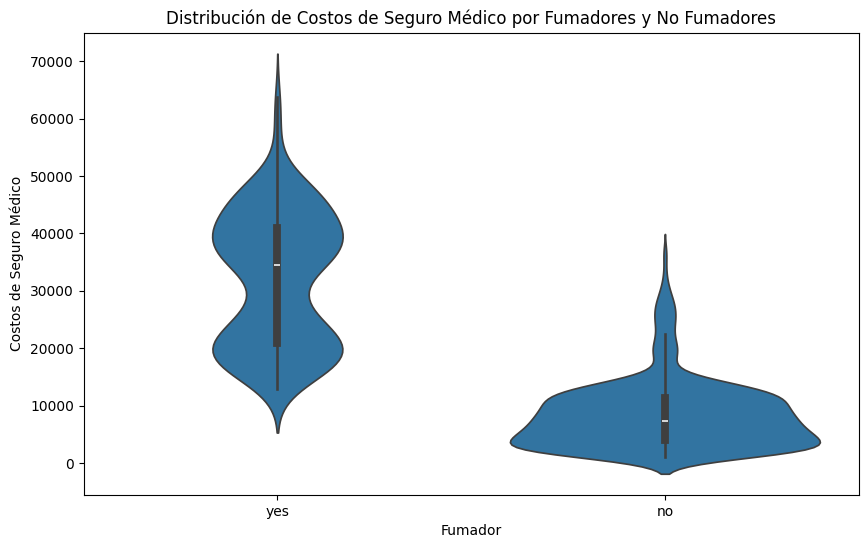

In [ ]:
#Analisis numerico -Categorico

# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Relación entre Fumar y Costos de Seguro Médico')
plt.xlabel('Fumador')
plt.ylabel('Costos de Seguro Médico')
plt.show()


#Diagrama de violin
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='smoker', y='charges')
plt.title('Distribución de Costos de Seguro Médico por Fumadores y No Fumadores')
plt.xlabel('Fumador')
plt.ylabel('Costos de Seguro Médico')

In [ ]:
#factorizar categoricas a numericas

for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_n'] = pd.factorize(df[column])[0]

df


,age,sex,bmi,children,smoker,region,charges,age_n,sex_n,bmi_n,children_n,smoker_n,region_n,charges_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1,1,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,2,1,2,2,1,1,2
3,33,male,22.705,0,no,northwest,21984.47061,3,1,3,0,1,2,3
4,32,male,28.880,0,no,northwest,3866.85520,4,1,4,0,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,45,1,547,2,1,2,1332
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,23,0,1,3,1333
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,139,0,1,1,1334
1336,21,female,25.800,0,no,southwest,2007.94500,27,0,335,0,1,0,1335


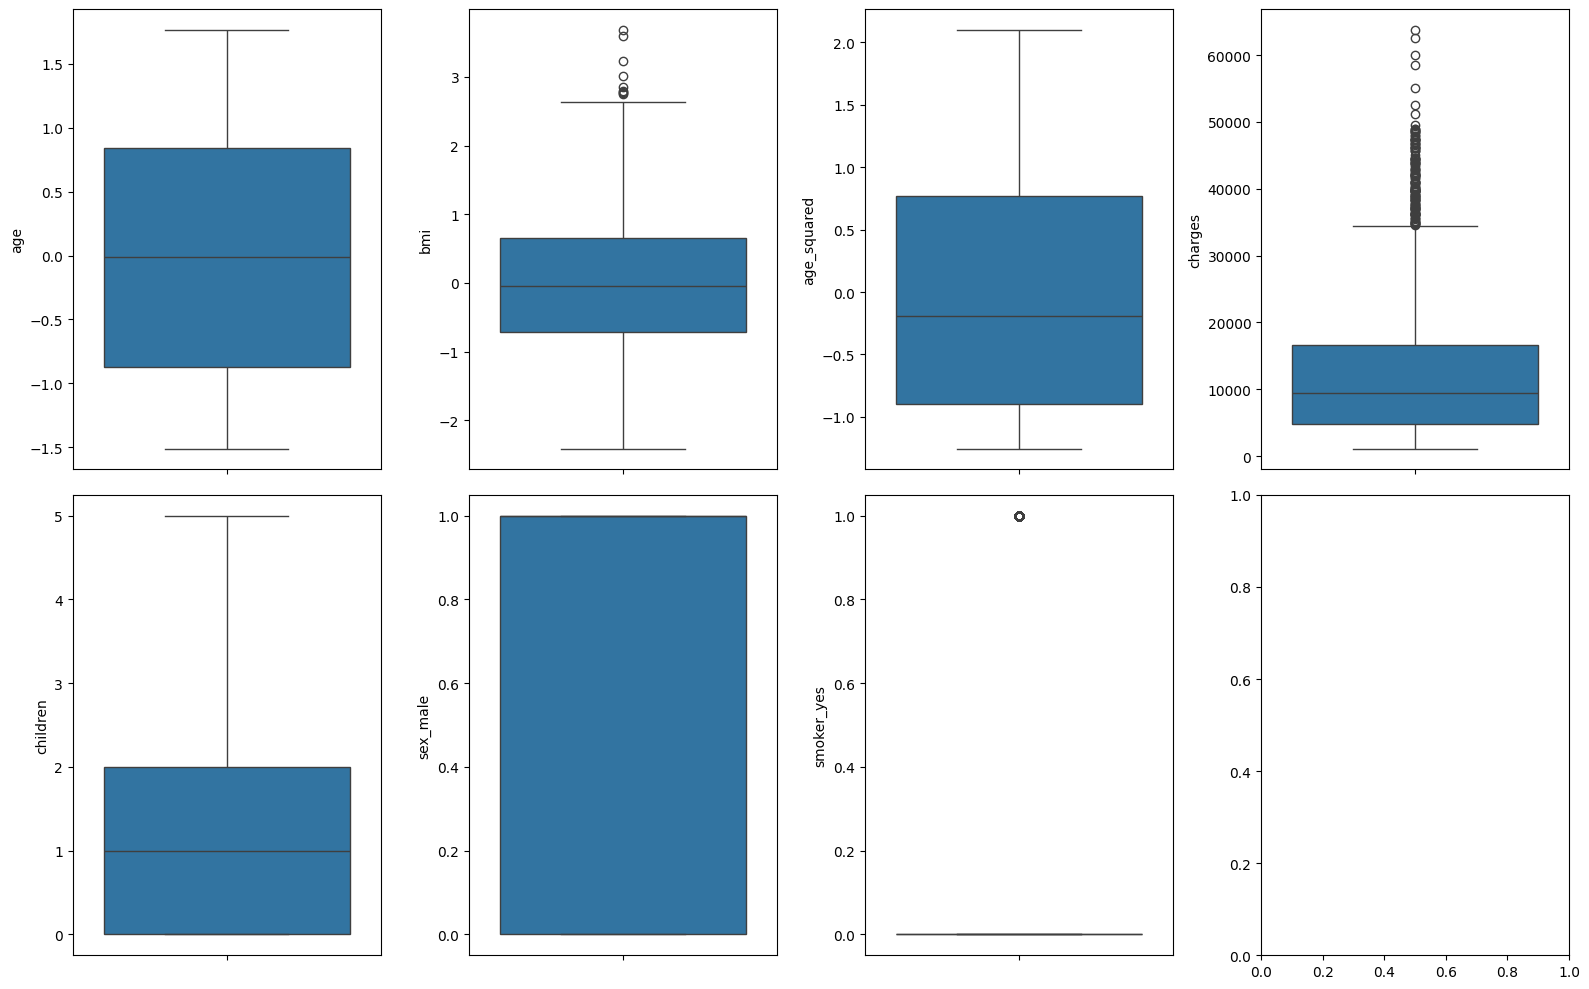

In [17]:
from sklearn.preprocessing import StandardScaler


# Asegurar que los nombres de columnas no tengan espacios
df.columns = df.columns.str.strip()

# Crear una característica derivada
df['age_squared'] = df['age'] ** 2

# Transformar variables categóricas en variables binarias
df['sex_male'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker_yes'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Normalizar variables numéricas
scaler = StandardScaler()
df[['age', 'bmi', 'age_squared']] = scaler.fit_transform(df[['age', 'bmi', 'age_squared']])

# Codificación one-hot para la variable region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Crear una característica de interacción
df['bmi_smoker'] = df['bmi'] * df['smoker_yes']

# Verificar si las columnas numéricas existen
for col in ['sex_male', 'smoker_yes']:
    if col not in df.columns:
        df[col] = pd.factorize(df[col.replace('_num', '')])[0]  # Factorizar si faltan

# Lista de columnas para los boxplots
listado_boxplots = ['age', 'bmi', 'age_squared', 'charges', 'children', 'sex_male', 'smoker_yes']

# Crear los boxplots
fig, axis = plt.subplots(2, 4, figsize=(16, 10))
axis = axis.flatten()

for contador, columna in enumerate(listado_boxplots):
    if columna in df.columns:  # Evita errores si la columna no está
        sns.boxplot(ax=axis[contador], data=df, y=columna)
        
plt.tight_layout()

In [18]:
# Calcular los rangos intercuartílicos y los valores atípicos
def calcular_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    return lower_bound, upper_bound, outliers

# Aplicar la función a las columnas numéricas
for columna in listado_boxplots:
    if columna in df.columns:
        lower_bound, upper_bound, outliers = calcular_outliers(df, columna)
        print(f"Columna: {columna}")
        print(f"Rango intercuartílico: ({lower_bound}, {upper_bound})")
        print(f"Valores atípicos encontrados: {len(outliers)}")
        print(outliers)
        print("\n")


Columna: age
Rango intercuartílico: (-3.4323975866893277, 3.4029166753387146)
Valores atípicos encontrados: 0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, charges, age_squared, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest, bmi_smoker]
Index: []


Columna: bmi
Rango intercuartílico: (-2.7827516193410657, 2.7275024683081144)
Valores atípicos encontrados: 9
           age     sex       bmi  children smoker      charges  age_squared  \
116   1.338082    male  3.017861         0     no  11381.32540     1.448046   
286   0.483668  female  2.855457         2     no   9432.92530     0.339055   
401   0.554869    male  2.765233         1     no   8083.91980     0.421697   
543   1.053277  female  2.747188         0    yes  63770.42801     1.049947   
847  -1.153959    male  3.234400         1     no   2438.05520    -1.071175   
860  -0.157143  female  2.778356         2    yes  46113.51100    -0.324739   
1047 -1.225161    male  3.595298         1    

In [ ]:
#si hay variable en muchas escalas, debemos eescalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#identificar variable numericas
variables_num = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n'] 

#escalar variables en numpy
features_escaladas = scaler.fit_transform(df[variables_num])

#se vuelve un dtaaframe again
df_escalado = pd.DataFrame(features_escaladas, index=df.index, columns = variables_num)
df_escalado.head()

,age,bmi,children,sex_n,smoker_n,region_n
0,-1.438764,-0.453320,-0.908614,-1.010519,-1.970587,-1.343905
1,-1.509965,0.509621,-0.078767,0.989591,0.507463,-0.438495
2,-0.797954,0.383307,1.580926,0.989591,0.507463,-0.438495
3,-0.441948,-1.305531,-0.908614,0.989591,0.507463,0.466915
4,-0.513149,-0.292556,-0.908614,0.989591,0.507463,0.466915


In [ ]:
df_escalado.describe()
#la media es cercana a 0 y la des estandr a 1

,age,bmi,children,sex_n,smoker_n,region_n
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17,-1.234687e-16,-1.606421e-16,-9.027823e-17
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01,-1.010519e+00,-1.970587e+00,-1.343905e+00
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01,-1.010519e+00,5.074631e-01,-4.384945e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02,9.895908e-01,5.074631e-01,-4.384945e-01
75%,8.396738e-01,6.611572e-01,7.510793e-01,9.895908e-01,5.074631e-01,4.669155e-01
max,1.765289e+00,3.685522e+00,3.240619e+00,9.895908e-01,5.074631e-01,1.372326e+00


In [ ]:
#Hacer test y train
from sklearn.model_selection import train_test_split

x = df_escalado
y = df ['charges']

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)
X_train


,age,bmi,children,sex_n,smoker_n,region_n
560,0.483668,-1.757474,0.751079,-1.010519,0.507463,0.466915
1285,0.554869,-1.040599,-0.908614,-1.010519,0.507463,1.372326
1142,0.910875,-0.952015,-0.908614,-1.010519,0.507463,-0.438495
969,-0.014740,0.599846,3.240619,-1.010519,0.507463,-0.438495
486,1.053277,-1.508126,1.580926,-1.010519,0.507463,0.466915
...,...,...,...,...,...,...
1095,-1.509965,0.112633,2.410772,-1.010519,0.507463,1.372326
1130,-0.014740,-1.114419,3.240619,-1.010519,0.507463,-0.438495
1294,1.338082,-0.900341,-0.908614,0.989591,0.507463,1.372326
860,-0.157143,2.778356,0.751079,-1.010519,-1.970587,-1.343905


In [ ]:
#importar el modelo a probar

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)




LinearRegression()

In [ ]:
#Variable para tomar desiciones

print (model.intercept_) 
print (model.coef_)

13315.445192139769
[ 3.61028043e+03  2.04689296e+03  5.12253132e+02 -9.39521400e+00
 -9.54291505e+03  2.99625864e+02]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [ ]:
##evaluar con metricas

from sklearn.metrics import mean_squared_error,r2_score

print (f"MSE: {mean_squared_error(y_test,y_pred)})")
print(f'R2 {r2_score(y_test,y_pred)}')

MSE: 33635210.43117845)
R2 0.7833463107364536


In [ ]:
x_train = X_train[['age','bmi', 'smoker_n']]  #varias columnas
x_test = X_test[['age','bmi', 'smoker_n']]

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print (f"MSE: {mean_squared_error(y_test,y_pred)})")
print(f'R2 {r2_score(y_test,y_pred)}')

MSE: 34512843.880227886)
R2 0.7776932310583375


In [ ]:
#Guardar modelo
from pickle import dump
dump(model,open('../models/linear_regression_default.sav','wb'))

Primer Modelo: Tiene un menor MSE y un mayor R², lo que indica que es ligeramente mejor en términos de precisión y capacidad de explicación de la variabilidad de los datos.

Segundo Modelo: Aunque ligeramente menos preciso, aún proporciona una buena capacidad predictiva con un menor número de características, lo que puede ser beneficioso en términos de simplicidad y eficiencia computacional.